### Libraries 

In [1]:
import pandas as pd
import numpy as  np

In [2]:
df = pd.read_csv('BAJFINANCE.csv')

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [4]:
df.set_index('Date',inplace=True)

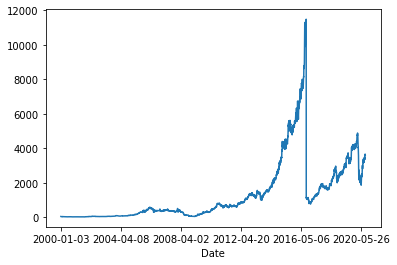

In [6]:
df['VWAP'].plot()

In [7]:
# We can notice that our data is not stationary

In [8]:
df.shape

(5070, 14)

In [9]:
df.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(2291, 14)

In [12]:
data = df.copy()

In [13]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [14]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [16]:
lag_features = ['High','Low','Volume','Turnover','Trades']
window1 = 3
window2 = 7

In [17]:
for feature in lag_features:
    data[feature+'rolling_mean_3'] = data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7'] = data[feature].rolling(window=window2).mean()

In [18]:
for feature in lag_features:
    data[feature+'rolling_std_3'] = data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7'] = data[feature].rolling(window=window2).std()

In [19]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [20]:
data.shape

(2291, 34)

In [21]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [22]:
data.dropna(inplace=True)

In [23]:
ind_features = ['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [24]:
training_data = data[0:1800]
test_data = data[1800:]

### Apply Auto ARIMA in our data

In [27]:
!pip install pmdarima

In [35]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [36]:
model = auto_arima(y=training_data['VWAP'],exogenous=training_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20931.544, Time=2.93 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20925.231, Time=3.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20926.355, Time=1.81 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20926.327, Time=3.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32616.913, Time=1.67 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20929.241, Time=3.57 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 16.818 seconds


In [37]:
model.fit(training_data['VWAP'],training_data[ind_features])

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [38]:
forecast = model.predict(n_periods=len(test_data),exogenous=test_data[ind_features])

In [39]:
test_data['forecast_ARIMA'] = forecast

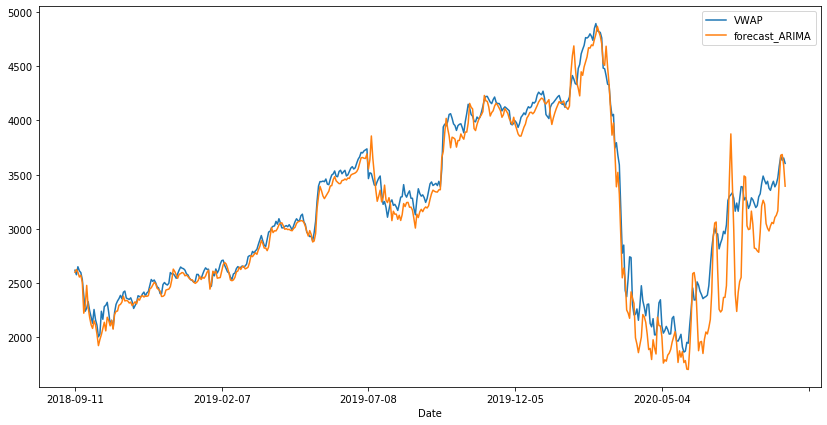

In [40]:
test_data[['VWAP','forecast_ARIMA']].plot(figsize=(14,7))

 ### Evaluating Time Series Model

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [43]:
np.sqrt(mean_squared_error(test_data['VWAP'],test_data['forecast_ARIMA']))

187.74127585900092

In [44]:
mean_absolute_error(test_data['VWAP'],test_data['forecast_ARIMA'])

124.62834167400744